In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pickle


path = os.getcwd().split(os.sep + 'network')[0]
if path not in sys.path:
    sys.path.append(path)

from neurolib.models.aln import ALNModel
from neurolib.utils import costFunctions as cost
import neurolib.dashboard.data as data

    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

In [2]:
def plot_0():

    fig, ax = plt.subplots(2,2, figsize=(12,10))
    ax[0,0].plot(aln.t, aln.rates_exc[0,:], lw=1, c='red', label='Node 0 exc')
    ax[0,1].plot(aln.t, aln.rates_inh[0,:], lw=1, c='blue', label='Node 0 inh')
    ax[1,0].plot(aln.t, aln.rates_exc[1,:], lw=1, c='red', label='Node 1 exc')
    ax[1,1].plot(aln.t, aln.rates_inh[1,:], lw=1, c='blue', label='Node 1 inh')


    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel("t [ms]")
            ax[i,j].set_ylabel("Rate [Hz]")
            ax[i,j].set_xlim(0, aln.t[-1])
    plt.show()

In [548]:
def plot(control0):

    fig, ax = plt.subplots(4,2, figsize=(12,14))
        
    ax[0,0].plot(aln.t, aln.rates_exc[0,:], lw=1, c='red', label='Node 0 exc')
    ax[0,1].plot(aln.t, aln.rates_inh[0,:], lw=1, c='blue', label='Node 0 inh')
    ax[1,0].plot(aln.t, aln.rates_exc[1,:], lw=1, c='red', label='Node 1 exc')
    ax[1,1].plot(aln.t, aln.rates_inh[1,:], lw=1, c='blue', label='Node 1 inh')

    #ax[0,0].plot(aln.t, target[0,0,:], linestyle='--', c='red')
    #ax[0,1].plot(aln.t, target[0,1,:], linestyle='--', c='blue')
    #ax[1,0].plot(aln.t, target[1,0,:], linestyle='--', c='red')
    #ax[1,1].plot(aln.t, target[1,1,:], linestyle='--', c='blue')

    ax[2,0].plot(aln.t, control0[0,0,:], c='red', label='Node 0 exc')
    ax[2,1].plot(aln.t, control0[0,1,:], c='blue', label='Node 0 inh')
    ax[3,0].plot(aln.t, control0[1,0,:], c='red', label='Node 1 exc')
    ax[3,1].plot(aln.t, control0[1,1,:], c='blue', label='Node 1 inh')

    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel("t [ms]")
            ax[i,j].set_ylabel("Rate [Hz]")
            ax[i,j].set_xlim(0, int(len(aln.t) * aln.params.dt))

    for i in range(2,4):
        for j in range(2):
            ax[i,j].set_xlabel("t [ms]")
            ax[i,j].set_ylabel("Control [nA]")
            ax[i,j].set_xlim(0, int(len(aln.t) * aln.params.dt))

    plt.show()
    
def plot_opt(control0, state0):

    fig, ax = plt.subplots(6,2, figsize=(12,14))
        
    ax[0,0].plot(aln.t, state0[0,0,:], lw=1, c='red', label='Node 0 exc')
    ax[0,1].plot(aln.t, state0[0,1,:], lw=1, c='blue', label='Node 0 inh')
    ax[1,0].plot(aln.t, state0[1,0,:], lw=1, c='red', label='Node 1 exc')
    ax[1,1].plot(aln.t, state0[1,1,:], lw=1, c='blue', label='Node 1 inh')

    #ax[0,0].plot(aln.t, target[0,0,:], linestyle='--', c='red')
    #ax[0,1].plot(aln.t, target[0,1,:], linestyle='--', c='blue')
    #ax[1,0].plot(aln.t, target[1,0,:], linestyle='--', c='red')
    #ax[1,1].plot(aln.t, target[1,1,:], linestyle='--', c='blue')
    
    ax[2,0].plot(aln.t, state0[0,9,:], c='red', label='Node 0 seev')
    ax[2,1].plot(aln.t, state0[0,15,:], c='red', label='Node 0 sigma_e')
    ax[3,0].plot(aln.t, state0[1,9,:], c='red', label='Node 1 seev')
    ax[3,1].plot(aln.t, state0[1,15,:], c='red', label='Node 1 sigma_e')

    ax[4,0].plot(aln.t, control0[0,0,:], c='red', label='Node 0 exc')
    ax[4,1].plot(aln.t, control0[0,1,:], c='blue', label='Node 0 inh')
    ax[5,0].plot(aln.t, control0[1,0,:], c='red', label='Node 1 exc')
    ax[5,1].plot(aln.t, control0[1,1,:], c='blue', label='Node 1 inh')

    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel("t [ms]")
            ax[i,j].set_ylabel("Rate [Hz]")
            ax[i,j].set_xlim(0, int(len(aln.t) * aln.params.dt))
            
    for j in range(2):
        ax[2,j].set_ylabel("seev")
        ax[3,j].set_ylabel("sigma_e")
        for i in range(2,4):
            ax[i,j].set_xlim(0, int(len(aln.t) * aln.params.dt))

    for i in range(4,6):
        for j in range(2):
            ax[i,j].set_xlabel("t [ms]")
            ax[i,j].set_ylabel("Control [nA]")
            ax[i,j].set_xlim(0, int(len(aln.t) * aln.params.dt))

    plt.show()
    
def setinit(initvars, N):
    state_vars = aln.state_vars
    init_vars = aln.init_vars
    for iv in range(len(init_vars)):
        for sv in range(len(state_vars)):
            if state_vars[sv] in init_vars[iv]:
                for n in range(N):
                    if aln.params[init_vars[iv]].ndim == 1:
                        aln.params[init_vars[iv]][n] = initvars[n,sv]
                    else:
                        aln.params[init_vars[iv]][n,:] = initvars[n,sv]

In [4]:
def initmodel(mue, mui, cmat, dmat):
    aln = ALNModel(Cmat = cmat, Dmat = dmat)
    aln.params.Dmat = dmat
    
    N = aln.params.N
    aln.params.sigma_ou = 0.
    aln.params.a = 0.
    aln.params.b = 0.

    aln.params.ext_exc_current = 0.
    aln.params.ext_inh_current = 0.

    aln.params.mue_ext_mean = mue * 5.
    aln.params.mui_ext_mean = mui * 5.
    
    aln.params.de = 0.
    aln.params.di = 0.
    
    return aln

In [501]:
cmat = 1. * np.array( [[0., 1.], [0., 0.]] )
dmat = 0. * np.array( [[1., 1.], [1., 1.]] )
aln = initmodel(0., 0., cmat, dmat)
N = aln.params.N
tol = 1e-10
start_step = 10.

max_cntrl = [5., 5., 100., 100., 100., 100.]
min_cntrl = [-5., -5., 0., 0., 0., 0.]

dur_pre = 1.
dur_post = 1.
trans_time = 1.
n_pre = int(dur_pre / aln.params.dt)
n_post = int(dur_post / aln.params.dt)

c_scheme = np.zeros(( 1,1 ))
c_scheme[0,0] = 1.
u_mat = np.identity(1)
u_scheme = np.array([[1.]])

dur = 1.
               
state_vars = aln.state_vars
init_vars = aln.init_vars

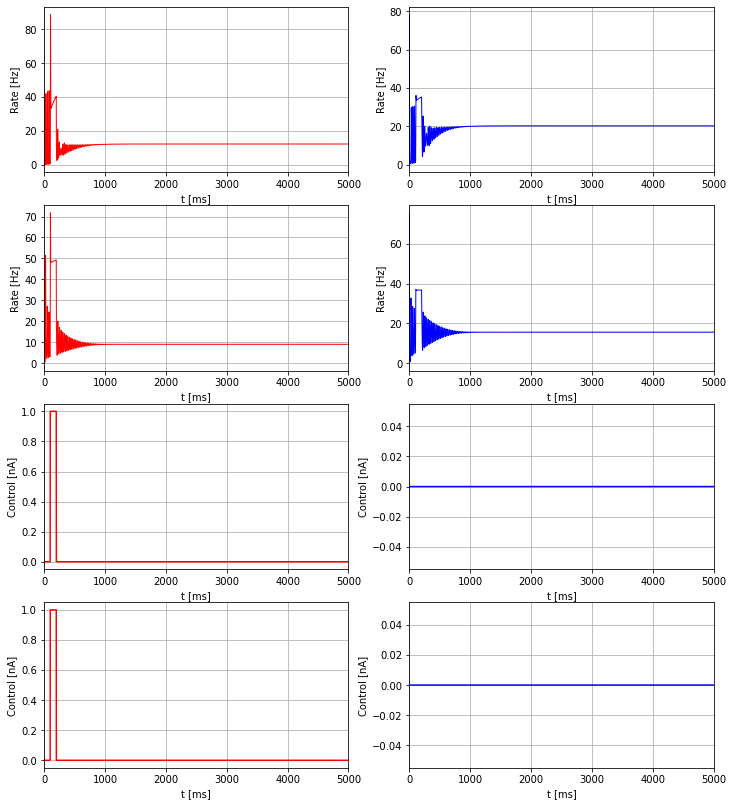

In [662]:
aln = initmodel(0.27,0.1, cmat, dmat)

aln.params.duration = 5000.
control0 = aln.getZeroControl()
control0[:,0,1000:2000] = 1.
aln.run( control = control0 )
plot(control0)

init_state_vars = np.zeros(( N, len(state_vars) ))
for n in range(N):
    for j in range(len(state_vars)):
        if aln.state[state_vars[j]][n].size == 1:
            init_state_vars[n, j] = aln.state[state_vars[j]][n]
        else:
            init_state_vars[n, j] = aln.state[state_vars[j]][n,-1]

initvars = init_state_vars

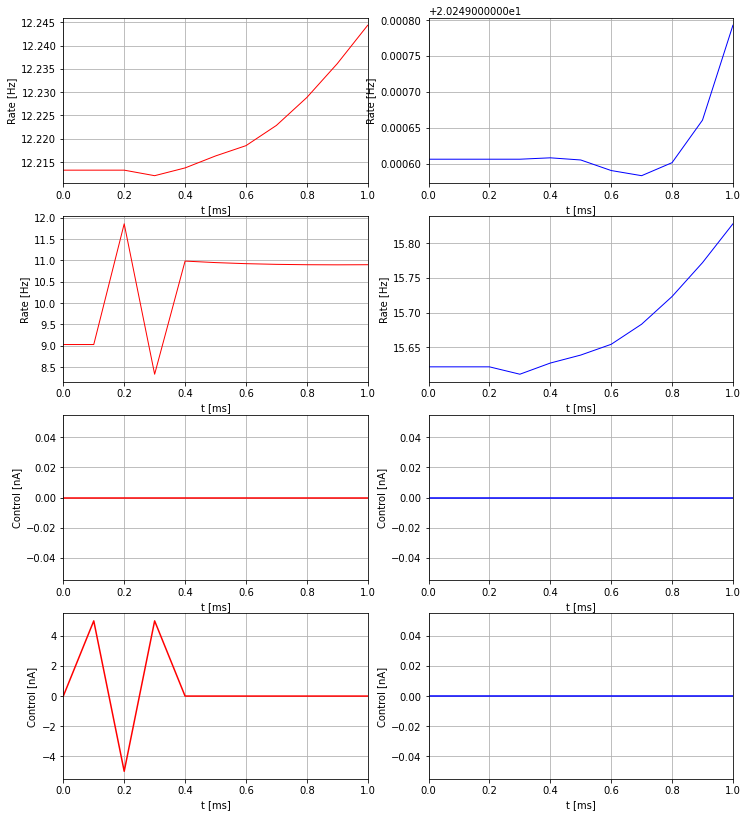

[10.92481915 10.90874192 10.90008857 10.89759251 10.90016068]
[0.75159122 0.75236483 0.75297864 0.75347501 0.75388568]
[0.00305601 0.0030412  0.00302483 0.00300912 0.00299497]
[0.67936723 0.67952989 0.67972677 0.6799495  0.68019194]
[12.21852872 12.2228662  12.22885444 12.23611093 12.24434229]


In [663]:
aln.params.duration = dur
setinit(initvars, N)
target = aln.getZeroTarget()
control0 = aln.getZeroControl()

control0[1,0,3] = 5.
control0[1,0,1] = 5.
control0[1,0,2] = -5.

control_init = control0

aln.run(control=control0)
plot(control0)

target[0,0,:] = aln.rates_exc[0,:]
target[1,0,:] = aln.rates_exc[1,:]
target[0,1,:] = aln.rates_inh[0,:]
target[1,1,:] = aln.rates_inh[1,:]

print(aln.state['rates_exc'][1,-5:])
print(aln.state['seem'][0,-5:])
print(aln.state['seev'][0,-5:])
print(aln.state['mufe'][0,-5:])
print(aln.state['rates_exc'][0,-5:])

set cost params:  1.0 0.0 0.0
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  9.297444840347236e-05
Gradient descend method:  None
RUN  1 , total integrated cost =  7.808531346569245e-07
RUN  2 , total integrated cost =  7.555964949911046e-07
RUN  3 , total integrated cost =  7.060538960647011e-07
RUN  4 , total integrated cost =  6.745361701935089e-07
RUN  5 , total integrated cost =  5.381932472563098e-07
RUN  6 , total integrated cost =  4.704722950807474e-07
RUN  7 , total integrated cost =  3.325458027746639e-07
RUN  8 , total integrated cost =  3.3089089863029955e-07
RUN  9 , total integrated cost =  3.2796000232864014e-07
RUN  10 , total integrated cost =  3.2694999630533053e-07
RUN  11 , total integrated cost =  3.2127105154909553e-07
RUN  12 , total integrated cost =  3.1721803054847695e-07
RUN  13 , total integrated cost =  3.1437286948564444e-07
RUN  14 , total integrated cost =  3.1015511264738487e-07
RUN  15 , total integrated cost =  3.092498469353

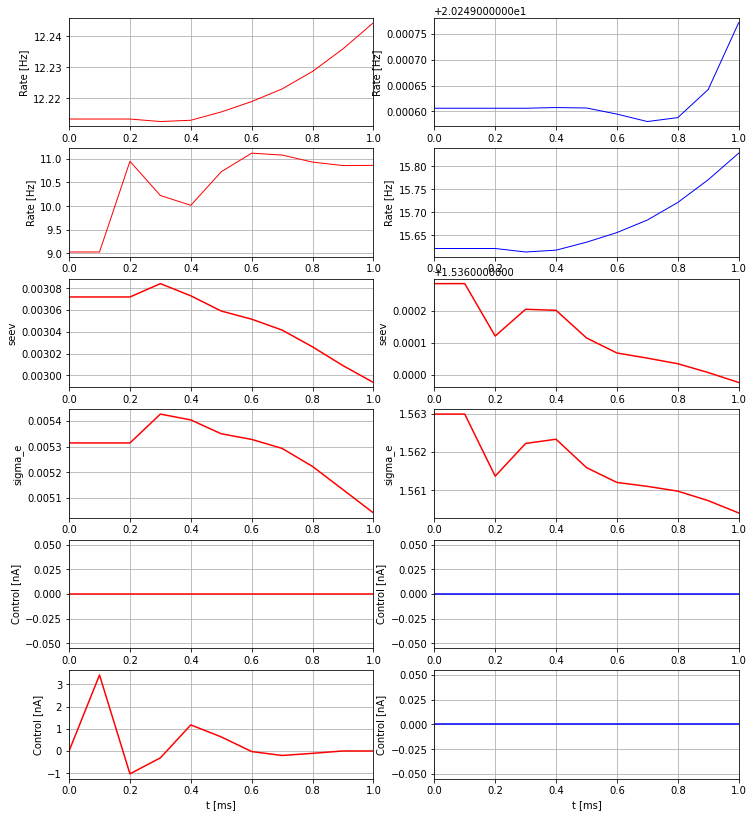

[ 0.00000000e+00 -2.56753783e-06 -1.29699108e-06 -1.33710530e-06
 -1.05664828e-06 -9.30992712e-08  2.98581675e-07  1.58207635e-07
  2.74428967e-09  0.00000000e+00  0.00000000e+00]
[ 0.          3.42064741 -1.03132902 -0.31008703  1.17279986  0.63273666
 -0.0266661  -0.20362943 -0.10709963  0.          0.        ]


In [664]:
max_it = int(100)
tol = 1e-48
aln.params.duration = dur
cost.setParams(1., 0., 0.)
optCList = []
start_step = 1e4

setinit(initvars, N)

c_var = np.array([[0,0,0,0,0,0],[1,0,0,0,0,0]])
p_var = np.array([[1,0],[0,0]])

control0 = aln.getZeroControl()
optControl, optState, c_, r_, g_, p_, costnode = aln.A1(
    control0, target, c_scheme, u_mat, u_scheme,
    max_iteration_ = max_it, tolerance_ = tol, startStep_ = start_step,
    max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
    t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None, control_variables_ = c_var,
    prec_variables_ = p_var, transition_time_ = 0.)
optCList.append(optControl)

plot_opt(optControl[:,:,10:-10], optState[:,:,10:-10])

print(g_[1,0,:])
print(optControl[1,0,10:-10])

interpolate adjoint :  True True True
RUN  0 , total integrated cost =  1.51058611547026e-10
Gradient descend method:  None
RUN  1 , total integrated cost =  1.5103097163507233e-10
RUN  2 , total integrated cost =  1.5101947345679156e-10
RUN  3 , total integrated cost =  1.50955145104498e-10
RUN  4 , total integrated cost =  1.509147674631633e-10
RUN  5 , total integrated cost =  1.5089284946554564e-10
RUN  6 , total integrated cost =  1.5085964228237237e-10
RUN  7 , total integrated cost =  1.5085306146025943e-10
RUN  8 , total integrated cost =  1.5082037306108233e-10
RUN  9 , total integrated cost =  1.508019204442714e-10
RUN  10 , total integrated cost =  1.5076856141716156e-10
RUN  11 , total integrated cost =  1.5072205430809798e-10
RUN  12 , total integrated cost =  1.5071668734201688e-10
RUN  13 , total integrated cost =  1.5068321469968587e-10
RUN  14 , total integrated cost =  1.506627903151299e-10
RUN  15 , total integrated cost =  1.5063870378212713e-10
RUN  16 , total inte

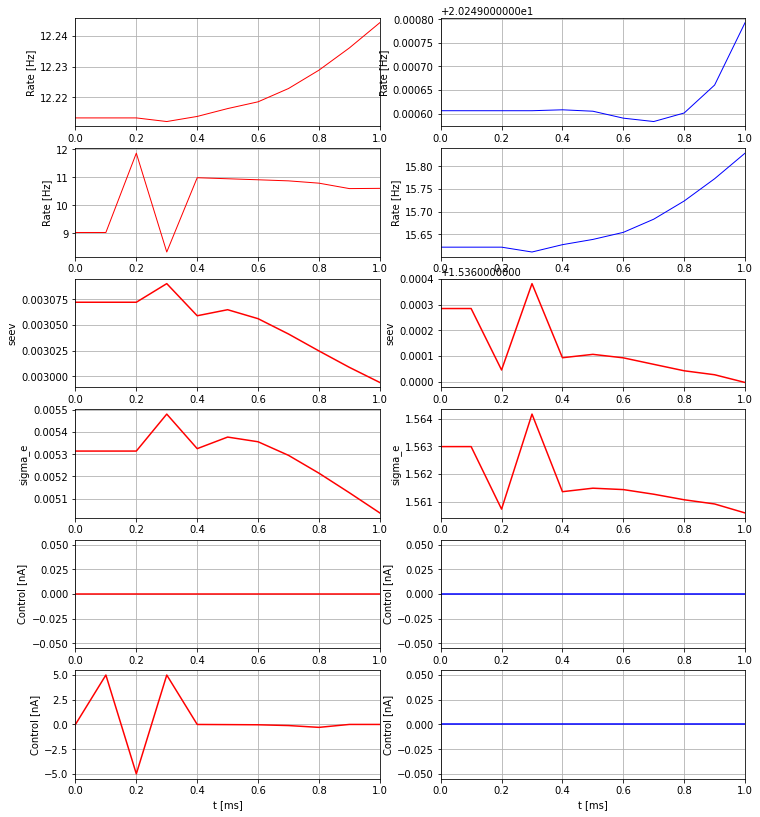

[ 0.00000000e+00 -4.14418762e-11 -4.05293795e-11 -3.51041093e-11
  9.55575629e-12 -4.36657528e-11  4.77488998e-11 -7.41294176e-11
  2.60544146e-11  0.00000000e+00  0.00000000e+00]
[ 0.00000000e+00  4.99887244e+00 -4.99948981e+00  4.99543221e+00
 -2.56922414e-03 -1.72544022e-02 -3.48477922e-02 -1.12455028e-01
 -2.95675410e-01  0.00000000e+00  0.00000000e+00]
diff =  [ 0.          0.00112756 -0.00051019  0.00456779  0.00256922  0.0172544
  0.03484779  0.11245503  0.29567541  0.          0.        ]
ratio =  [-2.72081738e+07  1.25881106e+07 -1.30121306e+08  2.68866645e+08
 -3.95147251e+08  7.29813511e+08 -1.51700947e+09]


In [668]:
max_it = int(10000)
tol = 1e-48
aln.params.duration = dur
setinit(initvars, N)
start_step = 1e4

control0 = aln.getZeroControl()
control0 = optCList[-1][:,:,10:-10]

optControl, optState, c_, r_, g_, p_, costnode = aln.A1(
    control0, target, c_scheme, u_mat, u_scheme,
    max_iteration_ = max_it, tolerance_ = tol, startStep_ = start_step,
    max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
    t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None, control_variables_ = c_var,
    prec_variables_ = p_var, transition_time_ = 0.)
optCList.append(optControl)

plot_opt(optControl[:,:,10:-10], optState[:,:,10:-10])
c_diff = control_init[1,0,:] - optControl[1,0,10:-10]
ratio = np.zeros(( c_diff.shape ))
ratio[1:-3] = np.round(c_diff[1:-3] / g_[1,0,1:-3], 15)

print(g_[1,0,:])
print(optControl[1,0,10:-10])
print('diff = ', c_diff)
print('ratio = ', ratio[1:-3])

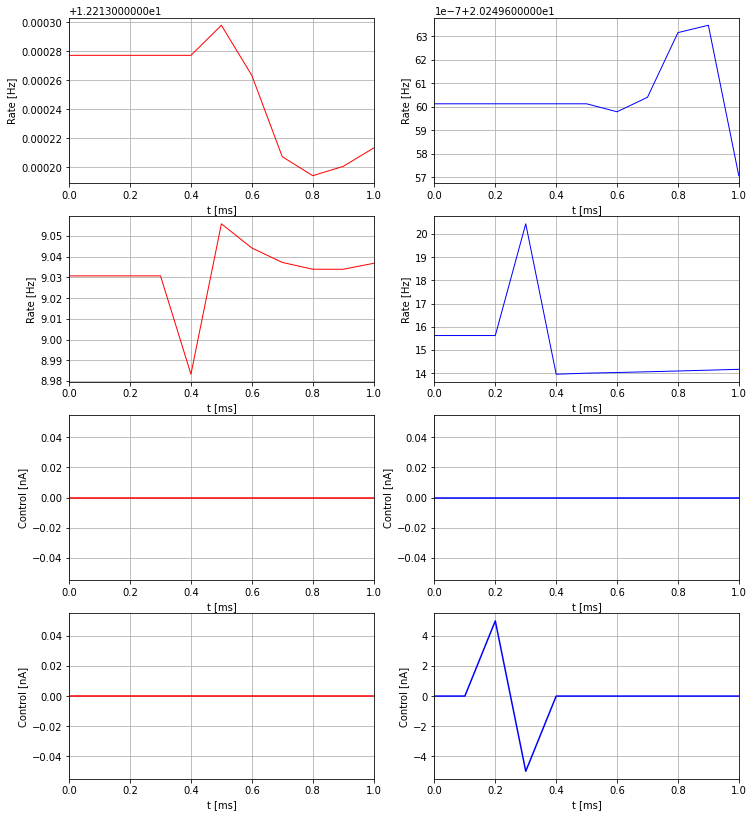

rates inh 1 [14.00107283 14.02910611 14.06020068 14.09386312 14.12956447 14.16686635]
seim 1 [0.70555929 0.70394049 0.70244789 0.70107664 0.69982173 0.69867798]
mufe 1 [0.58699697 0.58686066 0.58681509 0.58684998 0.58695649 0.58712692]
rates exc 1 [9.05588186 9.04421484 9.03724277 9.03395675 9.03393498 9.03680424]
seem 0 [0.74807089 0.74809782 0.74811024 0.74811464 0.74811558 0.74811633]
mufe 0 [0.67908703 0.67908525 0.67908481 0.67908497 0.67908534 0.67908575]
rates exc 0 [12.213298   12.2132634  12.21320729 12.21319417 12.21320057 12.21321325]


In [669]:
aln.params.duration = dur
setinit(initvars, N)
target = aln.getZeroTarget()
control0 = aln.getZeroControl()

control0[1,1,2] = 5.
control0[1,1,3] = -5.

aln.run(control=control0)
plot(control0)

target[0,0,:] = aln.rates_exc[0,:]
target[1,0,:] = aln.rates_exc[1,:]
target[0,1,:] = aln.rates_inh[0,:]
target[1,1,:] = aln.rates_inh[1,:]

print('rates inh 1', aln.state['rates_inh'][1,-6:])
print('seim 1', aln.state['seim'][1,-6:])
print('mufe 1', aln.state['mufe'][1,-6:])
print('rates exc 1', aln.state['rates_exc'][1,-6:])
print('seem 0', aln.state['seem'][0,-6:])
print('mufe 0', aln.state['mufe'][0,-6:])
print('rates exc 0', aln.state['rates_exc'][0,-6:])

set cost params:  1.0 0.0 0.0
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  1.1196722138196655e-09
Gradient descend method:  None
RUN  1 , total integrated cost =  3.489577403903738e-10
RUN  2 , total integrated cost =  3.3016282400672234e-10
RUN  3 , total integrated cost =  3.002506479947451e-10
RUN  4 , total integrated cost =  2.822672849950186e-10
RUN  5 , total integrated cost =  2.411586044801484e-10
RUN  6 , total integrated cost =  2.140373058268257e-10
RUN  7 , total integrated cost =  3.227426927278038e-11
RUN  8 , total integrated cost =  2.602461161838047e-11
RUN  9 , total integrated cost =  2.5993600624194096e-11
RUN  10 , total integrated cost =  2.586282571904106e-11
RUN  11 , total integrated cost =  2.5614344161291954e-11
RUN  12 , total integrated cost =  2.5593884208149366e-11
RUN  13 , total integrated cost =  2.423603967087512e-11
RUN  14 , total integrated cost =  2.2660536722929927e-11
RUN  15 , total integrated cost =  2.2639816721158

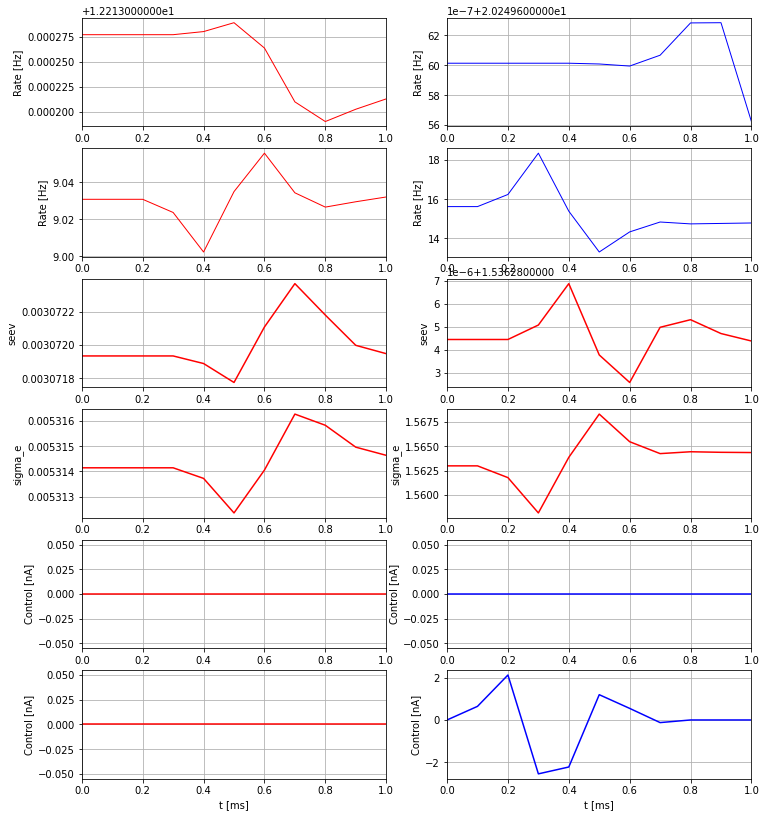

[ 0.          0.64242572  2.12090728 -2.54312517 -2.21937647  1.19267105
  0.54611305 -0.12398056  0.          0.          0.        ]


In [670]:
max_it = int(100)
tol = 1e-32
aln.params.duration = dur
cost.setParams(1., 0., 0.)
optCList = []
start_step = 1e4

setinit(initvars, N)

c_var = np.array([[0,0,0,0,0,0],[0,1,0,0,0,0]])
p_var = np.array([[1,0],[0,0]])

control0 = aln.getZeroControl()
optControl, optState, c_, r_, g_, p_, costnode = aln.A1(
    control0, target, c_scheme, u_mat, u_scheme,
    max_iteration_ = max_it, tolerance_ = tol, startStep_ = start_step,
    max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
    t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None, control_variables_ = c_var,
    prec_variables_ = p_var, transition_time_ = 0.)
optCList.append(optControl)

plot_opt(optControl[:,:,10:-10], optState[:,:,10:-10])

print(optControl[1,1,10:-10])

interpolate adjoint :  True True True
RUN  0 , total integrated cost =  5.642966888216928e-12
Gradient descend method:  None
RUN  1 , total integrated cost =  5.6397119149929365e-12
RUN  2 , total integrated cost =  5.6268673646850856e-12
RUN  3 , total integrated cost =  5.6239401197505e-12
RUN  4 , total integrated cost =  5.620687569048803e-12
RUN  5 , total integrated cost =  5.607950517662976e-12
RUN  6 , total integrated cost =  5.605045154831336e-12
RUN  7 , total integrated cost =  5.601793460420069e-12
RUN  8 , total integrated cost =  5.589156394312035e-12
RUN  9 , total integrated cost =  5.5862735853090165e-12
RUN  10 , total integrated cost =  5.583021694964475e-12
RUN  11 , total integrated cost =  5.570478488709916e-12
RUN  12 , total integrated cost =  5.56761877747581e-12
RUN  13 , total integrated cost =  5.564366014452891e-12
RUN  14 , total integrated cost =  5.551911633804513e-12
RUN  15 , total integrated cost =  5.549075478448127e-12
RUN  16 , total integrated co

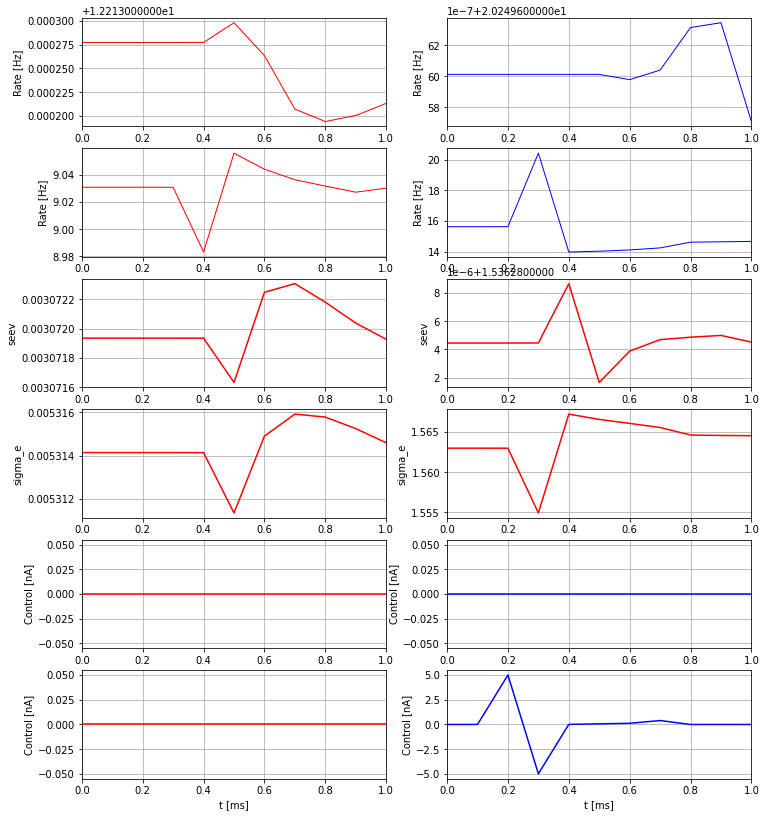

[ 0.00000000e+00  3.80545168e-03  4.99696663e+00 -4.99120997e+00
  8.47213464e-03  6.37624985e-02  1.19583647e-01  3.95555013e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [671]:
max_it = int(10000)
tol = 1e-32
aln.params.duration = dur
setinit(initvars, N)
start_step = 163840000

control0 = aln.getZeroControl()
control0 = optCList[-1][:,:,10:-10]

optControl, optState, c_, r_, g_, p_, costnode = aln.A1(
    control0, target, c_scheme, u_mat, u_scheme,
    max_iteration_ = max_it, tolerance_ = tol, startStep_ = start_step,
    max_control_ = max_cntrl, min_control_ = min_cntrl, t_sim_ = dur,
    t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None, control_variables_ = c_var,
    prec_variables_ = p_var, transition_time_ = 0.)
optCList.append(optControl)

plot_opt(optControl[:,:,10:-10], optState[:,:,10:-10])

print(optControl[1,1,10:-10])